In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import requests
import json
import datetime
import time
import os
import seaborn as sns

In [2]:
def get_data(ticker, start="2014-07-01", end="2024-07-02"):
    data = yf.Ticker(ticker)
    return data.history(start=start, end=end)

def min_max_scaler(data):
    return (data - data.min()) / (data.max() - data.min())

In [3]:
TICKS = ['AAL']
TICKS_NAMES = ['American Airlines']

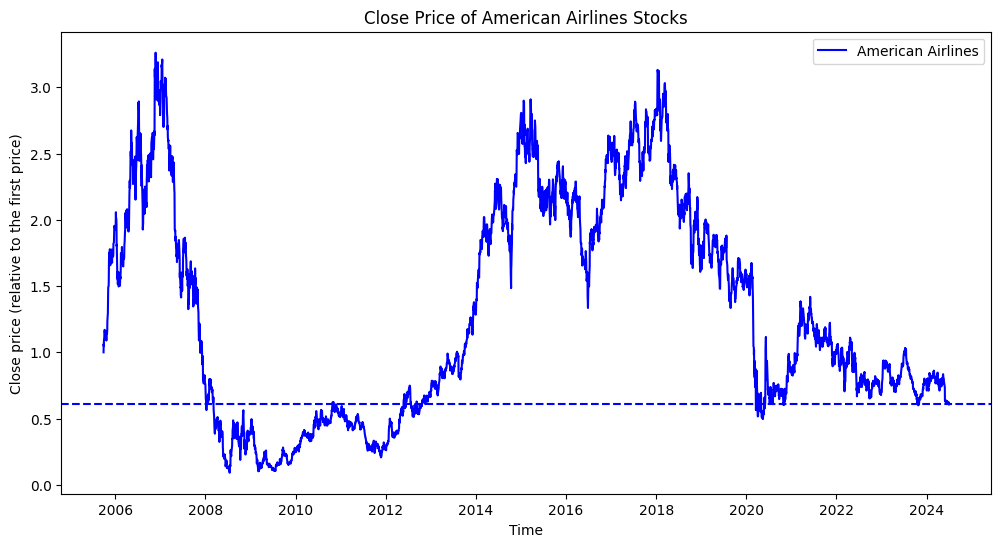

In [4]:
warnings.filterwarnings("ignore")
colors = ['blue', 'orange', 'green', 'red', 'purple']


def plot_data(TICKS, TICKS_NAMES, colors, title, start="1990-07-01", end="2024-07-02"):
    plt.figure(figsize=(12, 6))
    for ticker, color, ticker_name in zip(TICKS, colors, TICKS_NAMES):
        data = get_data(ticker, start, end)
        base_price = data['Close'][0]
        close_price = data['Close'] / base_price
        plt.plot(close_price, label=ticker_name, color=color)
        # plot horizonal dotted line from the last point, in the corresposind color
        plt.axhline(y=close_price[-1], color=color, linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Close price (relative to the first price)')
    plt.title(title)
    plt.legend()
    plt.show()

plot_data(TICKS, TICKS_NAMES, colors, title='Close Price of American Airlines Stocks')

In [5]:
df_AAL = get_data('AAL')
df_AAL = df_AAL['Close'] / df_AAL['Close'][0]
df_AAL = pd.DataFrame(df_AAL)

## Crude Oil Prices

In [6]:
df_crude_oil = pd.read_csv('data_final/BrentOilPrices.csv')
df_crude_oil['Date'] = pd.to_datetime(df_crude_oil['Date'])

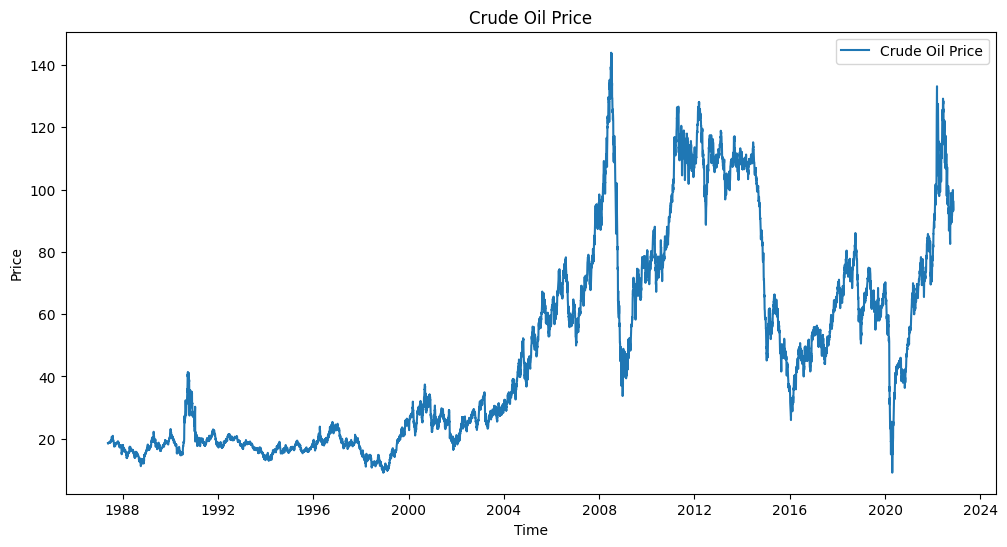

In [7]:
# plot crude oil prices
plt.figure(figsize=(12, 6))
plt.plot(df_crude_oil['Date'], df_crude_oil['Price'], label='Crude Oil Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Crude Oil Price')
plt.legend()
plt.show()

In [8]:
df_crude_oil

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37


## Jet Fuel Prices

In [9]:
jet_fuel = pd.read_csv('data_final/JetFuel.csv')
jet_fuel['Day'] = pd.to_datetime(jet_fuel['Day'])
jet_fuel.columns = ['Date', 'Price']

In [10]:
for i in range(60):
    shifted_jet_fuel = jet_fuel.copy()
    # shift the jet fuel dates back by i days
    shifted_jet_fuel['Date'] = shifted_jet_fuel['Date'] - pd.DateOffset(days=i)
    # merge the shifted jet fuel prices with the crude oil prices
    merged = pd.merge(df_crude_oil, shifted_jet_fuel, on='Date', how='inner')
    # calculate the correlation between the two prices
    corr = merged['Price_x'].corr(merged['Price_y'])
    print(f'correlation between crude oil and jet fuel prices shifted by {i} days: {corr}')

correlation between crude oil and jet fuel prices shifted by 0 days: 0.9853417176412943
correlation between crude oil and jet fuel prices shifted by 1 days: 0.9844973207352674
correlation between crude oil and jet fuel prices shifted by 2 days: 0.9836272546410078
correlation between crude oil and jet fuel prices shifted by 3 days: 0.9836908059817607
correlation between crude oil and jet fuel prices shifted by 4 days: 0.9844466957481153
correlation between crude oil and jet fuel prices shifted by 5 days: 0.984475681401618
correlation between crude oil and jet fuel prices shifted by 6 days: 0.983688201243969
correlation between crude oil and jet fuel prices shifted by 7 days: 0.9830667396926938
correlation between crude oil and jet fuel prices shifted by 8 days: 0.9824763813279763
correlation between crude oil and jet fuel prices shifted by 9 days: 0.9818231488855538
correlation between crude oil and jet fuel prices shifted by 10 days: 0.9824468743170314
correlation between crude oil and

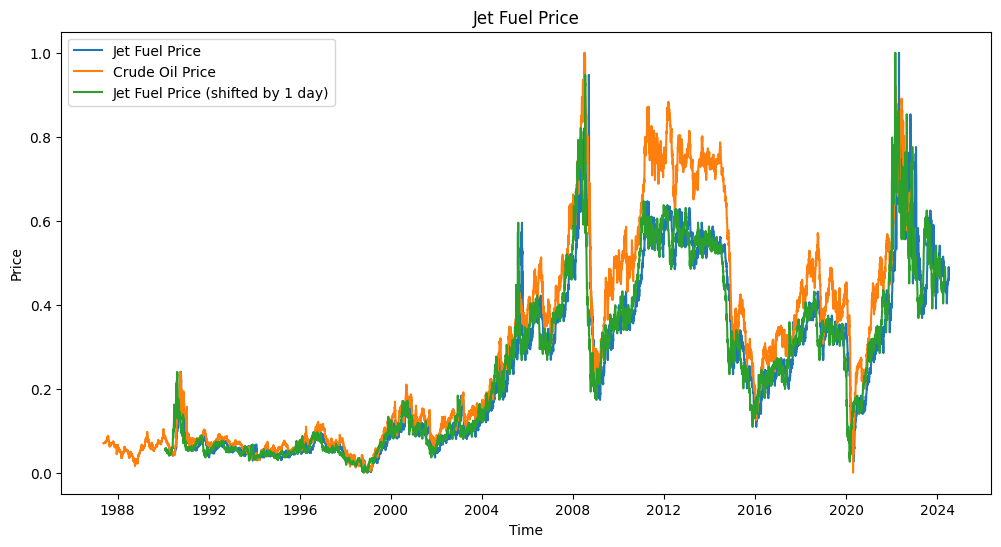

In [11]:
# plot jet fuel prices
plt.figure(figsize=(12, 6))
plt.plot(jet_fuel['Date'], min_max_scaler(jet_fuel['Price']), label='Jet Fuel Price')
plt.plot(df_crude_oil['Date'], min_max_scaler(df_crude_oil['Price']), label='Crude Oil Price')
plt.plot(shifted_jet_fuel['Date'], min_max_scaler(shifted_jet_fuel['Price']), label='Jet Fuel Price (shifted by 1 day)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Jet Fuel Price')
plt.legend()
plt.show()

In [12]:
def calc_correlation(data1, data2):
    return data1.corr(data2)

correlation = calc_correlation(df_crude_oil['Price'], jet_fuel['Price'])
correlation

-0.6698116375196306

## Airline Revenue and Expenses

In [13]:
revenue = pd.read_csv('data_final/airline_revenues.csv')
expenses = pd.read_csv('data_final/airline_expenses.csv')
# revenue['Year'] = pd.to_datetime(revenue['Year'])
# expenses['Year'] = pd.to_datetime(expenses['Year'])

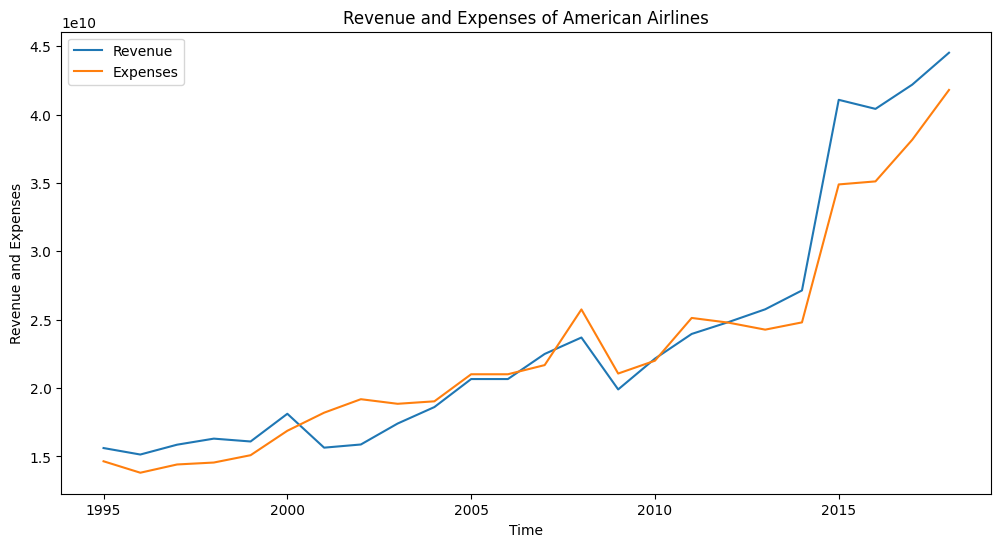

In [14]:
# plot both revenue and expenses
plt.figure(figsize=(12, 6))
plt.plot(revenue['Year'], revenue['American'], label='Revenue')
plt.plot(expenses['Year'], expenses['American'], label='Expenses')
plt.xlabel('Time')
plt.ylabel('Revenue and Expenses')
plt.title('Revenue and Expenses of American Airlines')
plt.legend()
plt.show()

## Quarterly Revenue and Net Income

In [15]:
revenue_quarterly = pd.read_csv('data_final/american_airlines_quarterly_revenue.csv')
revenue_quarterly['Date'] = pd.to_datetime(revenue_quarterly['Date'])

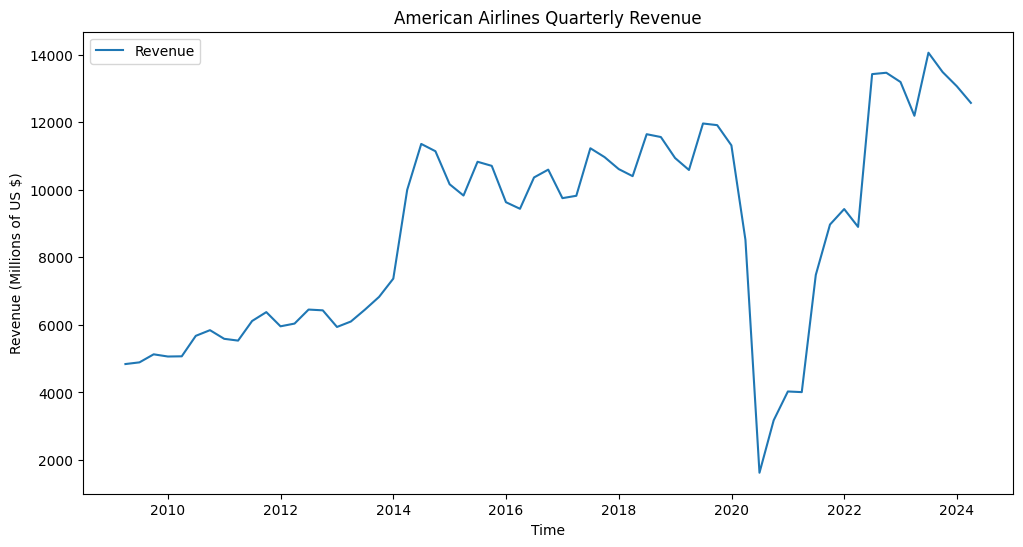

In [16]:
# plot quarterly revenue
plt.figure(figsize=(12, 6))
plt.plot(revenue_quarterly['Date'], revenue_quarterly['Revenue (Millions of US $)'], label='Revenue')
plt.xlabel('Time')
plt.ylabel('Revenue (Millions of US $)')
plt.title('American Airlines Quarterly Revenue')
plt.legend()
plt.show()

In [17]:
net_income_quarterly = pd.read_csv('data_final/american_airlines_quarterly_net_income.csv')
net_income_quarterly['Date'] = pd.to_datetime(net_income_quarterly['Date'])

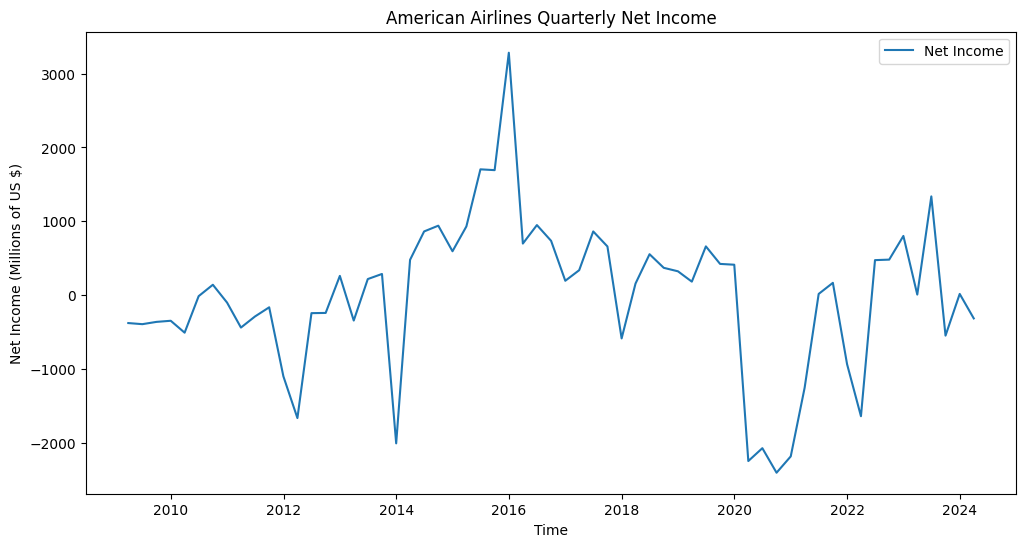

In [18]:
# plot quarterly net income
plt.figure(figsize=(12, 6))
plt.plot(net_income_quarterly['Date'], net_income_quarterly['Net Income (Millions of US $)'], label='Net Income')
plt.xlabel('Time')
plt.ylabel('Net Income (Millions of US $)')
plt.title('American Airlines Quarterly Net Income')
plt.legend()
plt.show()

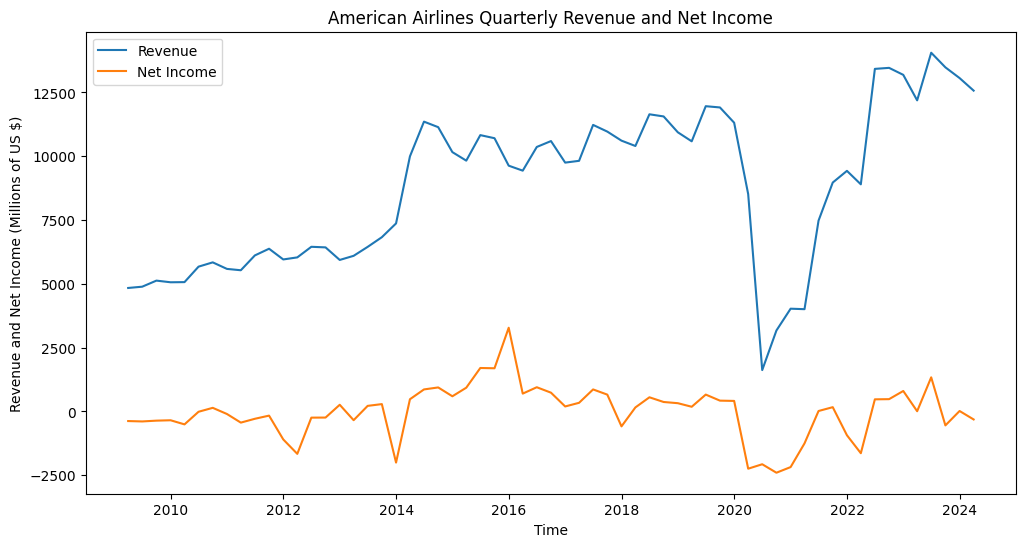

In [19]:
# plot both quarterly revenue and net income
plt.figure(figsize=(12, 6))
plt.plot(revenue_quarterly['Date'], revenue_quarterly['Revenue (Millions of US $)'], label='Revenue')
plt.plot(net_income_quarterly['Date'], net_income_quarterly['Net Income (Millions of US $)'], label='Net Income')
plt.xlabel('Time')
plt.ylabel('Revenue and Net Income (Millions of US $)')
plt.title('American Airlines Quarterly Revenue and Net Income')
plt.legend()
plt.show()

## S&P 500 Index

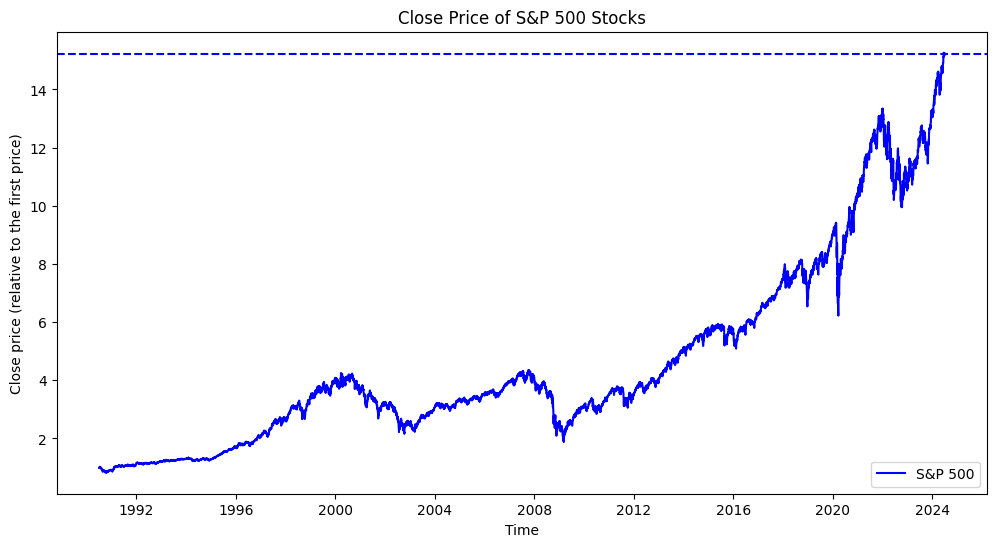

In [20]:
TICKS = ['^GSPC']
TICKS_NAMES = ['S&P 500']

plot_data(TICKS, TICKS_NAMES, colors, title='Close Price of S&P 500 Stocks')

In [21]:
df_sp500 = get_data('^GSPC')
df_sp500 = df_sp500['Close'] / df_sp500['Close'][0]
df_sp500 = pd.DataFrame(df_sp500)

## Combined

In [22]:
df_AAL.reset_index(inplace=True)
df_sp500.reset_index(inplace=True)

In [23]:
df_AAL['Date'] = pd.to_datetime(df_AAL['Date'])

In [24]:
# Date is like this "2014-07-01 00:00:00-04:00", i want it like this "2014-07-01 00:00:00"
df_AAL['Date'] = df_AAL['Date'].dt.strftime('%Y-%m-%d')
df_AAL['Date'] = pd.to_datetime(df_AAL['Date'])

df_sp500['Date'] = df_sp500['Date'].dt.strftime('%Y-%m-%d')
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

In [25]:
# combine the dataframes
df_AAL
df_crude_oil
jet_fuel
revenue_quarterly
net_income_quarterly
df_sp500

,Date,Close
0,2014-07-01,1.000000
1,2014-07-02,1.000659
2,2014-07-03,1.006142
3,2014-07-07,1.002194
4,2014-07-08,0.995130
...,...,...
2512,2024-06-25,2.771623
2513,2024-06-26,2.775982
2514,2024-06-27,2.778500
2515,2024-06-28,2.767154


In [26]:
# get date range for each dataframe
print(f'Close Price: ({df_AAL["Date"].min()}, {df_AAL["Date"].max()})')
print(f'Crude Oil Price: ({df_crude_oil["Date"].min()}, {df_crude_oil["Date"].max()})')
print(f'Jet Fuel Price: ({jet_fuel["Date"].min()}, {jet_fuel["Date"].max()})')
print(f'Revenue Quarterly: ({revenue_quarterly["Date"].min()}, {revenue_quarterly["Date"].max()})')
print(f'Net Income Quarterly: ({net_income_quarterly["Date"].min()}, {net_income_quarterly["Date"].max()})')
print(f'S&P 500: ({df_sp500["Date"].min()}, {df_sp500["Date"].max()})')

# get intersection of date ranges
start_date = max(df_AAL["Date"].min(), df_crude_oil["Date"].min(), jet_fuel["Date"].min(), revenue_quarterly["Date"].min(), net_income_quarterly["Date"].min(), df_sp500["Date"].min())
end_date = min(df_AAL["Date"].max(), df_crude_oil["Date"].max(), jet_fuel["Date"].max(), revenue_quarterly["Date"].max(), net_income_quarterly["Date"].max(), df_sp500["Date"].max())
print(f'Intersection of date ranges: ({start_date}, {end_date})')

Close Price: (2014-07-01 00:00:00, 2024-07-01 00:00:00)
Crude Oil Price: (1987-05-20 00:00:00, 2022-11-14 00:00:00)
Jet Fuel Price: (1990-04-02 00:00:00, 2024-07-08 00:00:00)
Revenue Quarterly: (2009-03-31 00:00:00, 2024-03-31 00:00:00)
Net Income Quarterly: (2009-03-31 00:00:00, 2024-03-31 00:00:00)
S&P 500: (2014-07-01 00:00:00, 2024-07-01 00:00:00)
Intersection of date ranges: (2014-07-01 00:00:00, 2022-11-14 00:00:00)


In [27]:
df_crude_oil.columns = ['Date', 'Crude Oil Price']
jet_fuel.columns = ['Date', 'Jet Fuel Price']
revenue_quarterly.columns = ['Date', 'Revenue']
net_income_quarterly.columns = ['Date', 'Net Income']
df_sp500.columns = ['Date', 'S&P 500']

In [28]:
# Create a complete date range dataframe
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
df_dates = pd.DataFrame(date_range, columns=['Date'])

df_AAL = df_AAL[(df_AAL['Date'] >= start_date) & (df_AAL['Date'] <= end_date)]
df_crude_oil = df_crude_oil[(df_crude_oil['Date'] >= start_date) & (df_crude_oil['Date'] <= end_date)]
df_jet_fuel = jet_fuel[(jet_fuel['Date'] >= start_date) & (jet_fuel['Date'] <= end_date)]
df_revenue_quarterly = revenue_quarterly[(revenue_quarterly['Date'] >= start_date) & (revenue_quarterly['Date'] <= end_date)]
df_net_income_quarterly = net_income_quarterly[(net_income_quarterly['Date'] >= start_date) & (net_income_quarterly['Date'] <= end_date)]
df_sp500 = df_sp500[(df_sp500['Date'] >= start_date) & (df_sp500['Date'] <= end_date)]

# Merge all dataframes with the date range dataframe
combined_df = df_dates.merge(df_AAL, on='Date', how='left') \
                      .merge(df_crude_oil, on='Date', how='left') \
                      .merge(df_jet_fuel, on='Date', how='left') \
                      .merge(df_revenue_quarterly, on='Date', how='left') \
                      .merge(df_net_income_quarterly, on='Date', how='left') \
                      .merge(df_sp500, on='Date', how='left')

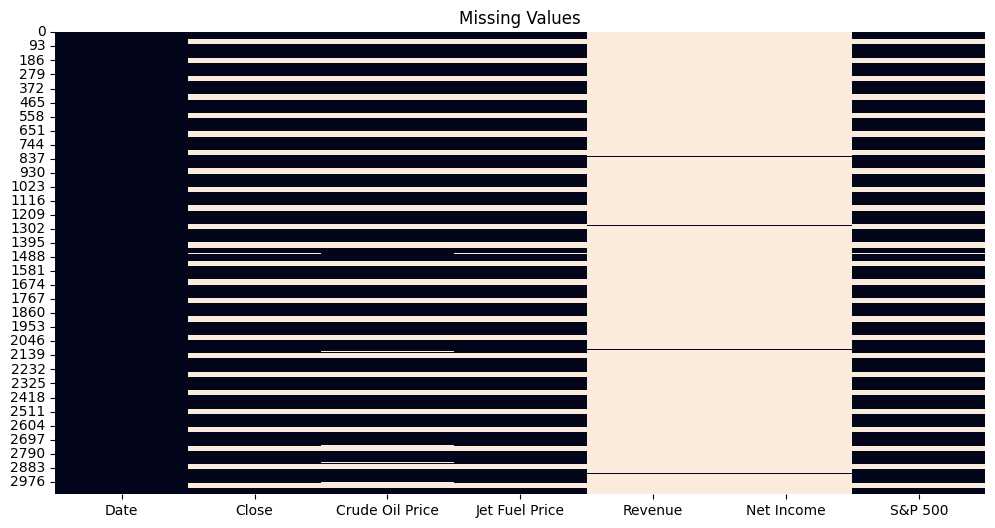

In [29]:
# plot missing values for each column
plt.figure(figsize=(12, 6))
sns.heatmap(combined_df.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()

In [30]:
# count nones 
print(f'close price: {combined_df["Close"].isnull().sum()} / {len(combined_df)} = {combined_df["Close"].isnull().sum() / len(combined_df)}')
print(f'crude oil price: {combined_df["Crude Oil Price"].isnull().sum()} / {len(combined_df)} = {combined_df["Crude Oil Price"].isnull().sum() / len(combined_df)}')
print(f'jet fuel price: {combined_df["Jet Fuel Price"].isnull().sum()} / {len(combined_df)} = {combined_df["Jet Fuel Price"].isnull().sum() / len(combined_df)}')
print(f'revenue: {combined_df["Revenue"].isnull().sum()} / {len(combined_df)} = {combined_df["Revenue"].isnull().sum() / len(combined_df)}')
print(f'net income: {combined_df["Net Income"].isnull().sum()} / {len(combined_df)} = {combined_df["Net Income"].isnull().sum() / len(combined_df)}')
print(f's&p 500: {combined_df["S&P 500"].isnull().sum()} / {len(combined_df)} = {combined_df["S&P 500"].isnull().sum() / len(combined_df)}')

close price: 949 / 3059 = 0.3102321019941157
crude oil price: 926 / 3059 = 0.3027133050016345
jet fuel price: 959 / 3059 = 0.3135011441647597
revenue: 3026 / 3059 = 0.9892121608368748
net income: 3026 / 3059 = 0.9892121608368748
s&p 500: 949 / 3059 = 0.3102321019941157


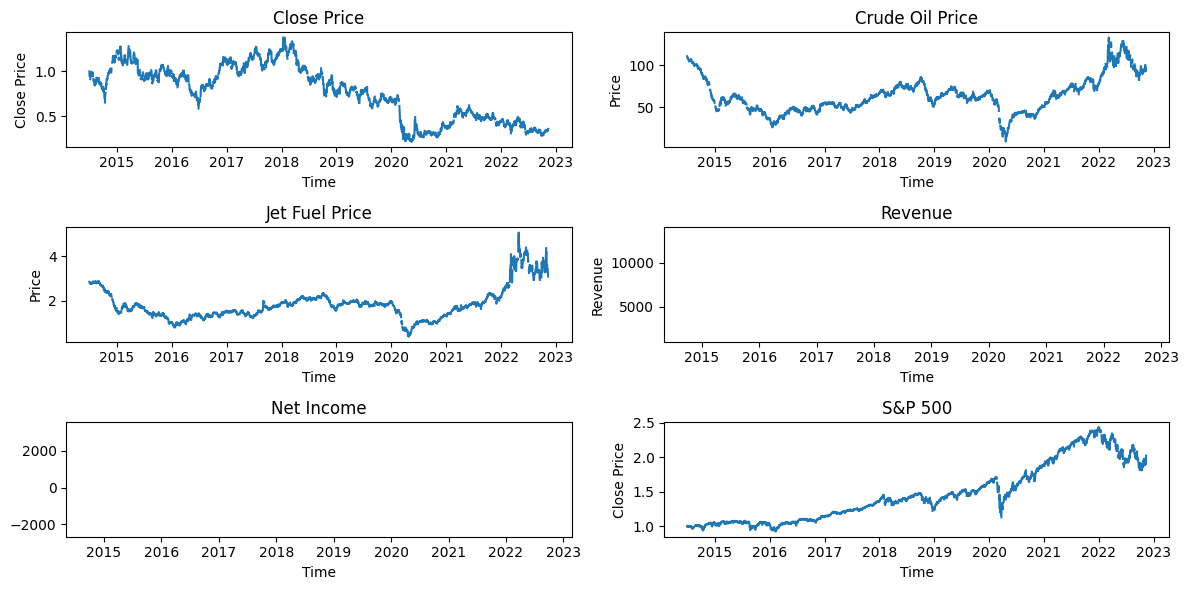

In [31]:
def plot_combined(combined_df):
    # plot all features on one figure (with multiple subplots)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 2, 1)
    plt.plot(combined_df['Date'], combined_df['Close'])
    plt.title('Close Price')
    plt.xlabel('Time')
    plt.ylabel('Close Price')

    plt.subplot(3, 2, 2)
    plt.plot(combined_df['Date'], combined_df['Crude Oil Price'])
    plt.title('Crude Oil Price')
    plt.xlabel('Time')
    plt.ylabel('Price')

    plt.subplot(3, 2, 3)
    plt.plot(combined_df['Date'], combined_df['Jet Fuel Price'])
    plt.title('Jet Fuel Price')
    plt.xlabel('Time')
    plt.ylabel('Price')

    plt.subplot(3, 2, 4)
    plt.plot(combined_df['Date'], combined_df['Revenue'])
    plt.title('Revenue')
    plt.xlabel('Time')
    plt.ylabel('Revenue')

    plt.subplot(3, 2, 5)
    plt.plot(combined_df['Date'], combined_df['Net Income'])
    plt.title('Net Income')
    plt.xlabel('Time')

    plt.subplot(3, 2, 6)
    plt.plot(combined_df['Date'], combined_df['S&P 500'])
    plt.title('S&P 500')
    plt.xlabel('Time')
    plt.ylabel('Close Price')

    plt.tight_layout()

    plt.show()

plot_combined(combined_df)

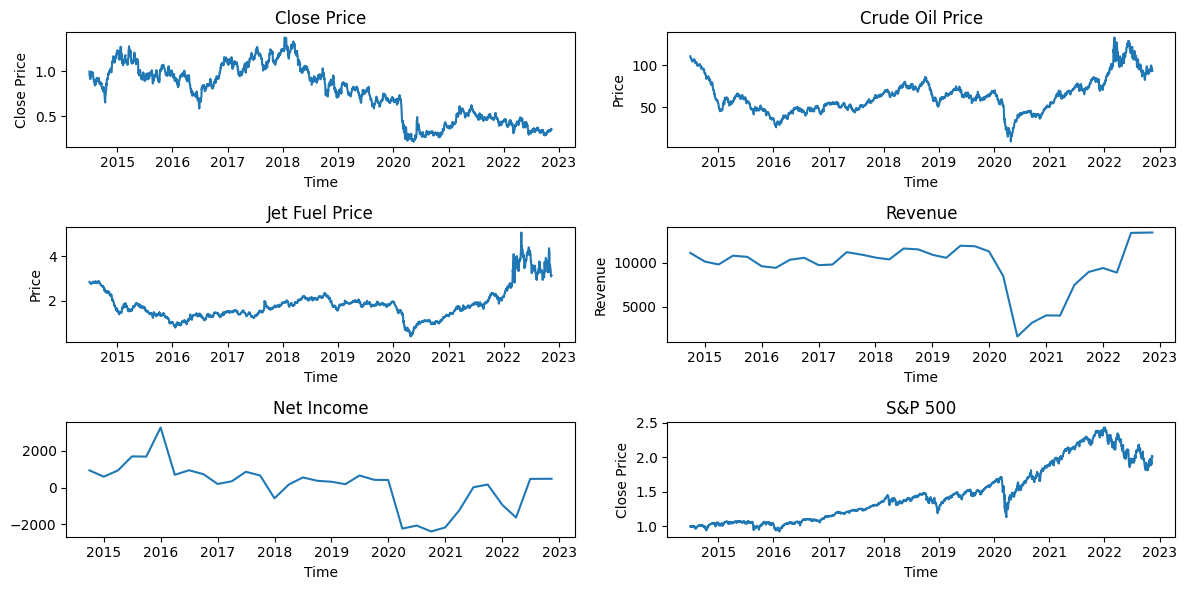

In [32]:
# fill missing values with interpolation
combined_df = combined_df.interpolate()
plot_combined(combined_df)

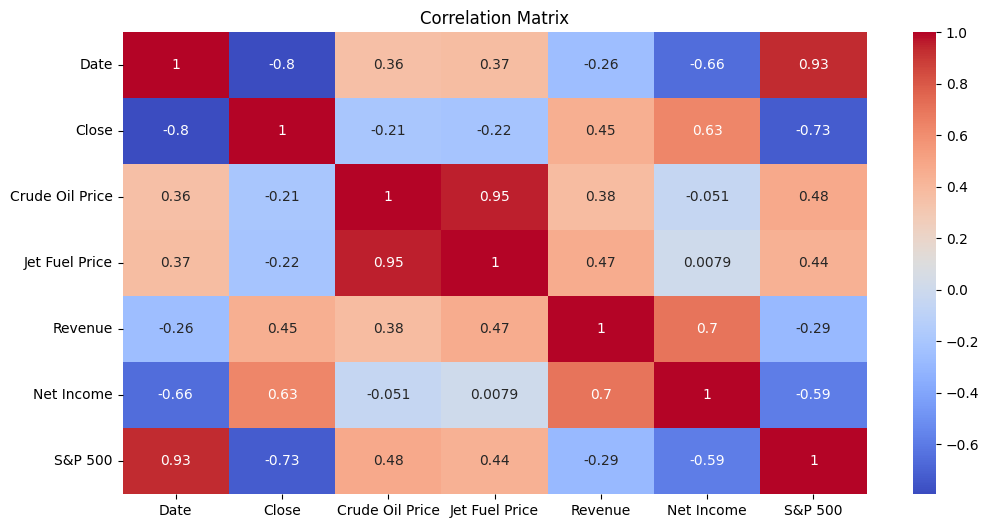

In [33]:
# calculate correlation matrix between all features
corr = combined_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()